In [1]:
!pip install networkx
!pip install matplotlib
!pip install nltk
!pip install scapy

#cyberpunk/neon plots
!pip install palmerpenguins
!pip install mplcyberpunk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scapy: filename=scapy-2.5.0-py2.py3-none-any.whl size=1444327 sha256=24ed30527a8f0347c5796097833c62ccb0f0de98f32218ce62725f4f27838593
  Stored in directory: /root/.cache/pip/wheels/82/b7/03/8344d8cf6695624746311bc0d389e9d05535ca83c35f90241d
Successfully built scapy


In [2]:
import networkx as nx
import matplotlib.pyplot as plt
from nltk import word_tokenize, pos_tag
import nltk

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [3]:
from palmerpenguins import load_penguins
import matplotlib.pyplot as plt
import mplcyberpunk

# Load the penguin dataset
penguins = load_penguins()

In [4]:
text2 = '''Mark drew a line from his sword. Upon drawing his sword a tiger appeared
this tiger, named Tony the tiger then ate a cookie. Sally thought it was funny.
Sally then called Bob.'''
text2

'Mark drew a line from his sword. Upon drawing his sword a tiger appeared\nthis tiger, named Tony the tiger then ate a cookie. Sally thought it was funny.\nSally then called Bob.'

In [5]:
text = '''
In a galaxy far, far away, amidst the swirling nebulae and distant star systems, lies the ancient planet of Alderaan. Here, beneath the watchful gaze of the towering mountains and lush forests, a young Jedi apprentice named Luke Skywalker embarks on an epic journey that will forever alter the course of history.
With his faithful droid companion, R2-D2, by his side, Luke sets out to uncover the truth about his mysterious past and unlock the secrets of the Force. Guided by the wisdom of the wise Jedi Master, Obi-Wan Kenobi, Luke learns the ways of the Force and hones his skills in preparation for the battles that lie ahead.
But the path to enlightenment is fraught with peril, and Luke soon finds himself entangled in a web of intrigue and deception. From the bustling streets of Coruscant to the desolate sands of Tatooine, he encounters a diverse array of beings, each with their own agendas and ambitions. Along the way, he forms unlikely alliances with smugglers, bounty hunters, and freedom fighters, all united in their quest to overthrow the tyrannical rule of the Galactic Empire.
As the conflict escalates, Luke discovers his true destiny as the last hope for the galaxy. With the fate of countless worlds hanging in the balance, he must confront his deepest fears and confront the dark forces that threaten to engulf the galaxy in chaos. With the power of the Force as his guide and the courage of his convictions as his strength, Luke embarks on a daring mission to restore peace and justice to the galaxy once and for all.
In the heart-pounding climax, Luke faces off against the sinister Sith Lord, Darth Vader, in a battle that will decide the fate of the galaxy. With lightsabers blazing and the fate of the universe hanging in the balance, Luke must draw upon all his training and courage to emerge victorious and fulfill his destiny as a Jedi Knight.
In the end, as the twin suns of Tatooine set on the horizon, Luke Skywalker stands triumphant, a beacon of hope for a galaxy in turmoil. With his friends by his side and the Force as his ally, he vows to continue his journey, exploring new worlds and seeking out new adventures in the endless expanse of the cosmos. For in the vastness of space, there are always new horizons to explore and new stories waiting to be told.
'''

text

'\nIn a galaxy far, far away, amidst the swirling nebulae and distant star systems, lies the ancient planet of Alderaan. Here, beneath the watchful gaze of the towering mountains and lush forests, a young Jedi apprentice named Luke Skywalker embarks on an epic journey that will forever alter the course of history.\nWith his faithful droid companion, R2-D2, by his side, Luke sets out to uncover the truth about his mysterious past and unlock the secrets of the Force. Guided by the wisdom of the wise Jedi Master, Obi-Wan Kenobi, Luke learns the ways of the Force and hones his skills in preparation for the battles that lie ahead.\nBut the path to enlightenment is fraught with peril, and Luke soon finds himself entangled in a web of intrigue and deception. From the bustling streets of Coruscant to the desolate sands of Tatooine, he encounters a diverse array of beings, each with their own agendas and ambitions. Along the way, he forms unlikely alliances with smugglers, bounty hunters, and f

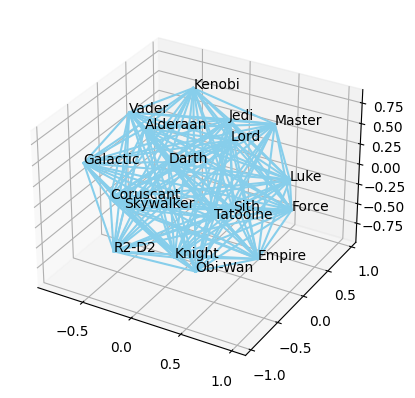

In [6]:
def create_network(text):
    # Tokenize the text and extract named entities using part-of-speech tagging
    entities = [word for word, pos in pos_tag(word_tokenize(text)) if pos == 'NNP']

    # Create a graph
    G = nx.Graph()

    # Add nodes for each unique entity
    for entity in set(entities):
        G.add_node(entity)

    # Add edges between co-occurring entities
    for i in range(len(entities)):
        for j in range(i+1, len(entities)):
            if entities[i] != entities[j]:
                G.add_edge(entities[i], entities[j])

    return G

def visualize_network_3d(graph):
    # Draw the graph
    pos = nx.spring_layout(graph, dim=3)  # Set dim=3 for 3D layout
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    for node in graph.nodes():
        ax.text(pos[node][0], pos[node][1], pos[node][2], node, fontsize=10)
    for edge in graph.edges():
        ax.plot([pos[edge[0]][0], pos[edge[1]][0]],
                [pos[edge[0]][1], pos[edge[1]][1]],
                [pos[edge[0]][2], pos[edge[1]][2]], color='skyblue')

    # Display the graph
    plt.show()

# Example text
#example_text = "John and Mary are good friends. They live in New York City."
example_text = text

# Create a network graph from the example text
network_graph = create_network(example_text)

# Visualize the 3D network graph
visualize_network_3d(network_graph)


<ipython-input-7-5547c3d8db84>:39: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist = 10  # Set the initial distance from the plot


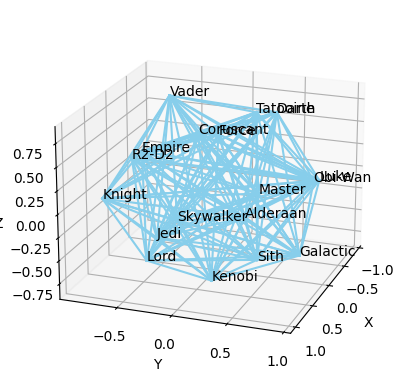

In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import networkx as nx
from nltk import word_tokenize, pos_tag

def create_network(text):
    # Tokenize the text and extract named entities using part-of-speech tagging
    entities = [word for word, pos in pos_tag(word_tokenize(text)) if pos == 'NNP']

    # Create a graph
    G = nx.Graph()

    # Add nodes for each unique entity
    for entity in set(entities):
        G.add_node(entity)

    # Add edges between co-occurring entities
    for i in range(len(entities)):
        for j in range(i+1, len(entities)):
            if entities[i] != entities[j]:
                G.add_edge(entities[i], entities[j])

    return G

def visualize_network_3d(graph):
    # Draw the graph
    pos = nx.spring_layout(graph, dim=3)  # Set dim=3 for 3D layout
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    for node in graph.nodes():
        ax.text(pos[node][0], pos[node][1], pos[node][2], node, fontsize=10)
    for edge in graph.edges():
        ax.plot([pos[edge[0]][0], pos[edge[1]][0]],
                [pos[edge[0]][1], pos[edge[1]][1]],
                [pos[edge[0]][2], pos[edge[1]][2]], color='skyblue')

    # Set interactive mode
    ax.view_init(elev=20, azim=20)  # Set the initial view angle
    ax.dist = 10  # Set the initial distance from the plot
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    # Display the graph
    plt.show()

# Example text
#example_text = "John and Mary are good friends. They live in New York City."
example_text = text

# Create a network graph from the example text
network_graph = create_network(example_text)

# Visualize the interactive 3D network graph
visualize_network_3d(network_graph)


In [8]:
%matplotlib notebook
visualize_network_3d(network_graph)

<IPython.core.display.Javascript object>

<ipython-input-7-5547c3d8db84>:39: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist = 10  # Set the initial distance from the plot


In [9]:
# prompt: create a 3D network graph of network_graph that I can interact with

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Set interactive mode
ax.view_init(elev=20, azim=20)  # Set the initial view angle
ax.dist = 10  # Set the initial distance from the plot
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Display the graph
plt.show()

# Make the plot interactive using %matplotlib notebook
%matplotlib notebook

# Visualize the interactive 3D network graph
visualize_network_3d(network_graph)


<IPython.core.display.Javascript object>

<ipython-input-9-8f6514d9af40>:8: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist = 10  # Set the initial distance from the plot


<IPython.core.display.Javascript object>

<ipython-input-7-5547c3d8db84>:39: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist = 10  # Set the initial distance from the plot


In [10]:
def visualize_network_3d(graph, ax):
    # Draw the nodes
    pos = nx.spring_layout(graph, dim=2)  # Use 2D layout for 3D plotting
    nx.draw_networkx_nodes(graph, pos, ax=ax)

    # Draw the edges
    nx.draw_networkx_edges(graph, pos, ax=ax)

    # Draw the labels
    labels = nx.get_node_attributes(graph, 'label')
    nx.draw_networkx_labels(graph, pos, labels=labels, ax=ax)

    # Display the graph
    plt.show()

# Make the plot interactive using %matplotlib notebook
%matplotlib notebook

# Create a 3D figure and axis object
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Set initial view angle
ax.view_init(elev=20, azim=20)

# Set labels for the axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Visualize the interactive 3D network graph
visualize_network_3d(network_graph, ax)


<IPython.core.display.Javascript object>

In [11]:
# Create the plot with the cyberpunk style
plt.style.use("cyberpunk")
fig, ax = plt.subplots(figsize=(10, 6))
import seaborn as sns
%matplotlib inline

# Define the colors for each species
species_colors = {
    'Adelie': 'cyan',
    'Chinstrap': 'magenta',
    'Gentoo': 'yellow'
}

# Plot KDE for body mass by species
for species in penguins['species'].unique():
    subset = penguins[penguins['species'] == species]
    sns.kdeplot(subset['body_mass_g'], ax=ax, lw=3, color=species_colors[species])

# Enhance with cyberpunk style
mplcyberpunk.add_glow_effects()

# Manually create legend handles and labels
handles = [plt.Line2D([], [], color=species_colors[species], label=species, linewidth=3) for species in penguins['species'].unique()]

# Create the legend
ax.legend(handles=handles, title='Species')
legend = ax.get_legend()
plt.setp(legend.get_texts(), color='white')

# Set the title and labels
ax.set_title('Body Mass Distribution by Species')
ax.set_xlabel('Body Mass (g)')
ax.set_ylabel('Density')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

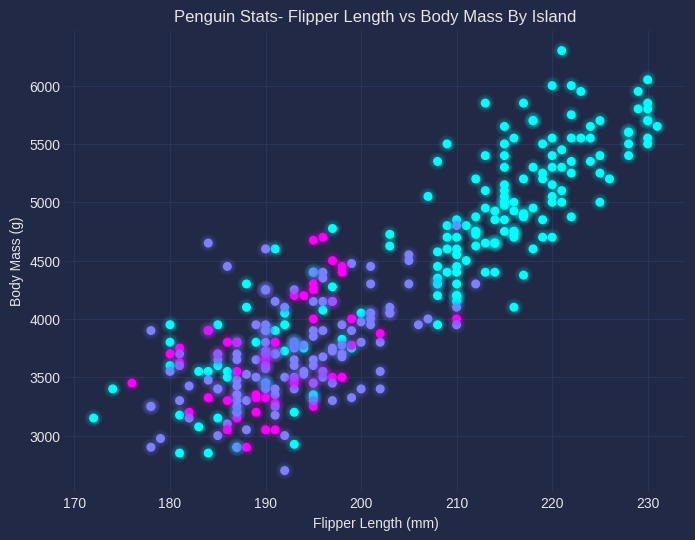

In [12]:
# Create the plot with the cyberpunk style
plt.style.use('cyberpunk')
fig, ax = plt.subplots(figsize=(8, 6))
scatter = ax.scatter(penguins['flipper_length_mm'], penguins['body_mass_g'], s=30,
                     c=penguins['island'].astype('category').cat.codes, cmap='cool')

# Enhance the plot with cyberpunk style glow effect
mplcyberpunk.make_scatter_glow(ax)

# Set the title and labels
ax.set_title("Penguin Stats- Flipper Length vs Body Mass By Island")
ax.set_xlabel("Flipper Length (mm)")
ax.set_ylabel("Body Mass (g)")
plt.show()

In [13]:
from google.colab import files
uploaded = files.upload()

Saving NTP_sync.pcap to NTP_sync.pcap


<ipython-input-14-2955e7c792d1>:40: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist = 10  # Set the initial distance from the plot


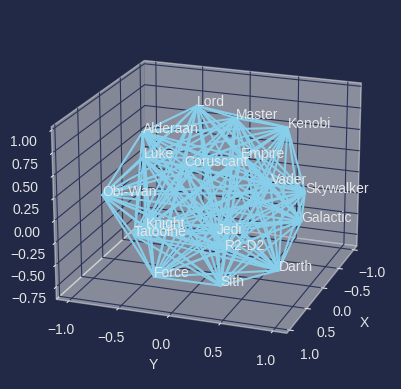

In [14]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import networkx as nx
from nltk import word_tokenize, pos_tag
import pandas as pd

def create_network(text):
    # Tokenize the text and extract named entities using part-of-speech tagging
    entities = [word for word, pos in pos_tag(word_tokenize(text)) if pos == 'NNP']

    # Create a graph
    G = nx.Graph()

    # Add nodes for each unique entity
    for entity in set(entities):
        G.add_node(entity)

    # Add edges between co-occurring entities
    for i in range(len(entities)):
        for j in range(i+1, len(entities)):
            if entities[i] != entities[j]:
                G.add_edge(entities[i], entities[j])

    return G

def visualize_network_3d(graph):
    # Draw the graph
    pos = nx.spring_layout(graph, dim=3)  # Set dim=3 for 3D layout
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    for node in graph.nodes():
        ax.text(pos[node][0], pos[node][1], pos[node][2], node, fontsize=10)
    for edge in graph.edges():
        ax.plot([pos[edge[0]][0], pos[edge[1]][0]],
                [pos[edge[0]][1], pos[edge[1]][1]],
                [pos[edge[0]][2], pos[edge[1]][2]], color='skyblue')

    # Set interactive mode
    ax.view_init(elev=20, azim=20)  # Set the initial view angle
    ax.dist = 10  # Set the initial distance from the plot
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    # Display the graph
    plt.show()

def save_to_csv(graph, filename):
    # Extract node and edge information
    nodes = list(graph.nodes())
    edges = list(graph.edges())

    # Create DataFrame
    nodes_df = pd.DataFrame(nodes, columns=['Node'])
    edges_df = pd.DataFrame(edges, columns=['Source', 'Target'])

    # Save to CSV
    nodes_df.to_csv(f"{filename}_nodes.csv", index=False)
    edges_df.to_csv(f"{filename}_edges.csv", index=False)

# Example text
example_text = text

# Create a network graph from the example text
network_graph = create_network(example_text)

# Save node and edge information to CSV files
save_to_csv(network_graph, "network_graph")

# Visualize the interactive 3D network graph
visualize_network_3d(network_graph)


In [15]:
#Save output to csv to render in this or other program

# Load CSV files into DataFrames
nodes_df = pd.read_csv("network_graph_nodes.csv")
edges_df = pd.read_csv("network_graph_edges.csv")

# Display the first few rows of each DataFrame
print("Nodes DataFrame:")
print(nodes_df.head())

print("\nEdges DataFrame:")
print(edges_df.head())

Nodes DataFrame:
      Node
0   Knight
1  Obi-Wan
2     Sith
3    Vader
4   Kenobi

Edges DataFrame:
   Source     Target
0  Knight   Alderaan
1  Knight       Jedi
2  Knight       Luke
3  Knight  Skywalker
4  Knight      R2-D2


In [16]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Load CSV files into DataFrames
nodes_df = pd.read_csv("network_graph_nodes.csv")
edges_df = pd.read_csv("network_graph_edges.csv")

# Display the first few rows of each DataFrame
print("Nodes DataFrame:")
print(nodes_df.head())

print("\nEdges DataFrame:")
print(edges_df.head())

# Create the network graph from the DataFrames
G = nx.Graph()

# Add nodes from nodes_df
for idx, row in nodes_df.iterrows():
    G.add_node(row['Node'])

# Add edges from edges_df
for idx, row in edges_df.iterrows():
    G.add_edge(row['Source'], row['Target'])

# Plot the 3D network graph with labels and hover information
pos = nx.spring_layout(G, dim=3)
edge_x = []
edge_y = []
edge_z = []
for edge in G.edges():
    source_pos = pos[edge[0]]
    target_pos = pos[edge[1]]
    edge_x += [source_pos[0], target_pos[0], None]
    edge_y += [source_pos[1], target_pos[1], None]
    edge_z += [source_pos[2], target_pos[2], None]

edge_trace = go.Scatter3d(
    x=edge_x, y=edge_y, z=edge_z,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
node_z = []
node_names = []  # List to store node names for labels
node_hoverinfo = []  # List to store hover information for nodes
for node in G.nodes():
    node_x.append(pos[node][0])
    node_y.append(pos[node][1])
    node_z.append(pos[node][2])
    node_names.append(node)  # Store node name for label
    connected_nodes = ', '.join(G.neighbors(node))
    node_hoverinfo.append(f"Node: {node}<br>Connected Nodes: {connected_nodes}")

node_trace = go.Scatter3d(
    x=node_x, y=node_y, z=node_z,
    mode='markers+text',  # Add text labels to markers
    marker=dict(symbol='circle',
                size=5,
                color='blue',
                line=dict(color='black', width=0.5)),
    text=node_names,  # Set node names as text labels
    hoverinfo='text',
    hovertext=node_hoverinfo)  # Set custom hover information

fig = make_subplots(rows=1, cols=1)
fig.add_trace(edge_trace)
fig.add_trace(node_trace)

# Update layout to remove axis labels and background and turn off hover box
fig.update_layout(scene=dict(
                    xaxis=dict(showticklabels=False, showbackground=False, title='', visible=False),
                    yaxis=dict(showticklabels=False, showbackground=False, title='', visible=False),
                    zaxis=dict(showticklabels=False, showbackground=False, title='', visible=False),
                    ),
                  title_text="3D Network Graph with Labels and Hover Information",
                  hovermode='closest',  # Turn off hover box
                  clickmode='event+select')  # Disable box selection tool

fig.show()


Nodes DataFrame:
      Node
0   Knight
1  Obi-Wan
2     Sith
3    Vader
4   Kenobi

Edges DataFrame:
   Source     Target
0  Knight   Alderaan
1  Knight       Jedi
2  Knight       Luke
3  Knight  Skywalker
4  Knight      R2-D2


In [17]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import os

# Extract filename from the path of the CSV file
filename = "network_graph_nodes.csv"  # Replace with the actual filename
title = os.path.splitext(os.path.basename(filename))[0]

# Load CSV files into DataFrames
nodes_df = pd.read_csv("network_graph_nodes.csv")
edges_df = pd.read_csv("network_graph_edges.csv")

# Create the network graph from the DataFrames
G = nx.Graph()

# Add nodes from nodes_df
for idx, row in nodes_df.iterrows():
    G.add_node(row['Node'])

# Add edges from edges_df
for idx, row in edges_df.iterrows():
    G.add_edge(row['Source'], row['Target'])

# Plot the 3D network graph with labels and hover information
pos = nx.spring_layout(G, dim=3)
edge_x = []
edge_y = []
edge_z = []
for edge in G.edges():
    source_pos = pos[edge[0]]
    target_pos = pos[edge[1]]
    edge_x += [source_pos[0], target_pos[0], None]
    edge_y += [source_pos[1], target_pos[1], None]
    edge_z += [source_pos[2], target_pos[2], None]

edge_trace = go.Scatter3d(
    x=edge_x, y=edge_y, z=edge_z,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
node_z = []
node_names = []  # List to store node names for labels
node_hoverinfo = []  # List to store hover information for nodes
for node in G.nodes():
    node_x.append(pos[node][0])
    node_y.append(pos[node][1])
    node_z.append(pos[node][2])
    node_names.append(node)  # Store node name for label
    connected_nodes = sorted(G.neighbors(node))  # Sort the connected nodes alphabetically
    connected_nodes_text = '<br>'.join(connected_nodes)  # Use line breaks for vertical list
    # Format hover text with HTML formatting to bold "Node:" and underline "Connected Nodes:"
    node_hoverinfo.append(f"<b>NODE:</b> {node}<br><b>CONNECTED TO:</b><br>{connected_nodes_text}")

node_trace = go.Scatter3d(
    x=node_x, y=node_y, z=node_z,
    mode='markers+text',  # Add text labels to markers
    marker=dict(symbol='circle',
                size=5,
                color='red',  # Set node color to red
                line=dict(color='black', width=0.5)),
    text=node_names,  # Set node names as text labels
    textfont=dict(color='white'),  # Set text color to white
    hoverinfo='text',
    hovertext=node_hoverinfo)  # Set custom hover information

fig = make_subplots(rows=1, cols=1)
fig.add_trace(edge_trace)
fig.add_trace(node_trace)

# Update layout to remove axis labels and background and turn off hover box
fig.update_layout(scene=dict(
                    xaxis=dict(showticklabels=False, showbackground=False, title='', visible=False),
                    yaxis=dict(showticklabels=False, showbackground=False, title='', visible=False),
                    zaxis=dict(showticklabels=False, showbackground=False, title='', visible=False),
                    bgcolor='black'  # Set background color of 3D scene to black
                    ),
                  #title_text="3D Network Graph with Labels and Hover Information",
                  title_text=f"3D Network Graph of: {title}",
                  hovermode='closest',  # Turn off hover box
                  clickmode='event+select'  # Disable box selection tool
                  )

fig.show()


In [18]:
import plotly.express as px
import pandas as pd

# Create a DataFrame with sample data
data = {
    'flipper_length_mm': [172, 168, 181, 182, 179],
    'body_mass_g': [3750, 3800, 3900, 3950, 4000],
    'island': ['Torgersen', 'Torgersen', 'Biscoe', 'Biscoe', 'Dream']
}
penguins = pd.DataFrame(data)

# Create the interactive plot
fig = px.scatter(penguins, x='flipper_length_mm', y='body_mass_g', color='island',
                 title="Penguin Stats - Flipper Length vs Body Mass By Island",
                 labels={'flipper_length_mm': 'Flipper Length (mm)', 'body_mass_g': 'Body Mass (g)'},
                 template='plotly_dark')

# Show the interactive plot
fig.show()
